# More flexible way of drawing
- For each group, specify the position (circle or a line)
- For each node, specify its group id, size, and color
- For each edge, specify weight and color
- Show the name of each node outside the circle
- No longer need NetworkX

In [1]:
import numpy as np
import h5py
from importlib import reload
from iddn_paper import tool_sys
from iddn import visualize_multi as viz_network
from iddn import visualize_basic

top_folder = tool_sys.get_work_folder() + "experiment_iddn_paper"


## Example 1

In [ ]:
exp_name = "sim3_tf_mrna_n-hub_2_n-node_144_hill_1.0_sigma_bi_2_1_2_ratio_0.25_n_10000"  # Two layers
dat_file = f"{top_folder}/sim_input/{exp_name}.hdf5"
f = h5py.File(dat_file, "r")
comm_gt = np.array(f["comm_gt"])
layer_count = np.array(f["layer_count"])
f.close()

In [ ]:
# Position and shape of each component (for each group)
cen_lst = np.array([[-0.9, 0], [0.9, 0]])
rad_lst = np.array([[0.6, 0.7], [0.6, 0.7]])

# Prepare nodes
n1, n2 = layer_count[0], layer_count[1]
mol_name = [f"mrna_{i}" for i in range(n1)] + [f"prot_{i}" for i in range(n2)]
mol_grp = np.hstack((np.zeros(n1, dtype=int), np.ones(n2, dtype=int)))

# Prepare edges
node0, node1 = np.where(np.tril(comm_gt, k=-1)>0)
edge_mol0 = []
edge_mol1 = []
edge_color = []
edge_weight = []
edge_style = []
for i in range(len(node0)):
    mol0 = mol_name[node0[i]]
    mol1 = mol_name[node1[i]]
    edge_mol0.append(mol0)
    edge_mol1.append(mol1)
    if mol0[5:]==mol1[5:]:
        edge_color.append('red')
        edge_weight.append(0.25)
        edge_style.append('solid')
    else:
        edge_color.append('blue')
        edge_weight.append(1)
        edge_style.append('dashed')


In [ ]:
reload(viz_network)
reload(visualize_basic)
viz_network.draw_multi_layer_network(
    cen_lst=cen_lst,
    rad_lst=rad_lst,
    mol_name=mol_name,
    mol_grp=mol_grp,
    edge_mol0=edge_mol0,
    edge_mol1=edge_mol1,
    edge_color=edge_color,
    edge_weight=edge_weight,
    edge_style=edge_style,
)

## Example 2

In [2]:
exp_name = "sim3_tf_mrna_mirna_n_100_hill_1.0_sigma_unif_ratio_0.25_640008"  # Three layers
dat_file = f"{top_folder}/sim_input/{exp_name}.hdf5"
f = h5py.File(dat_file, "r")
comm_gt = np.array(f["comm_gt"])
mol_names = np.array(f["node_names"])
layer_count = np.array(f["layer_count"])
f.close()

In [15]:
# Position and shape of each component (for each group)
cen_lst = np.array([[-1, 0.6], [1, 0.6], [0, -0.9]])
rad_lst = np.array([[0.4, 0.6], [0.4, 0.6], [0.4, 0.4]])

# Prepare nodes
# mRNA, protein, miRNA
n1, n2, n3 = layer_count[0], layer_count[1], layer_count[2]
mol_name = [f"mrna_{i}" for i in range(n1)] + [f"prot_{i}" for i in range(n2)] + [f"mirna_{i}" for i in range(n3)]
mol_grp = np.hstack((np.zeros(n1, dtype=int), np.ones(n2, dtype=int), np.ones(n3, dtype=int)*2))

# Prepare edges
node0, node1 = np.where(np.tril(comm_gt, k=-1)>0)
edge_mol0 = []
edge_mol1 = []
edge_color = []
edge_weight = []
edge_style = []
for i in range(len(node0)):
    mol0 = mol_name[node0[i]]
    mol1 = mol_name[node1[i]]
    edge_mol0.append(mol0)
    edge_mol1.append(mol1)
    if mol0[5:]==mol1[5:]:
        edge_color.append('red')
        edge_weight.append(0.25)
        edge_style.append('solid')
    else:
        edge_color.append('blue')
        edge_weight.append(1)
        edge_style.append('dashed')


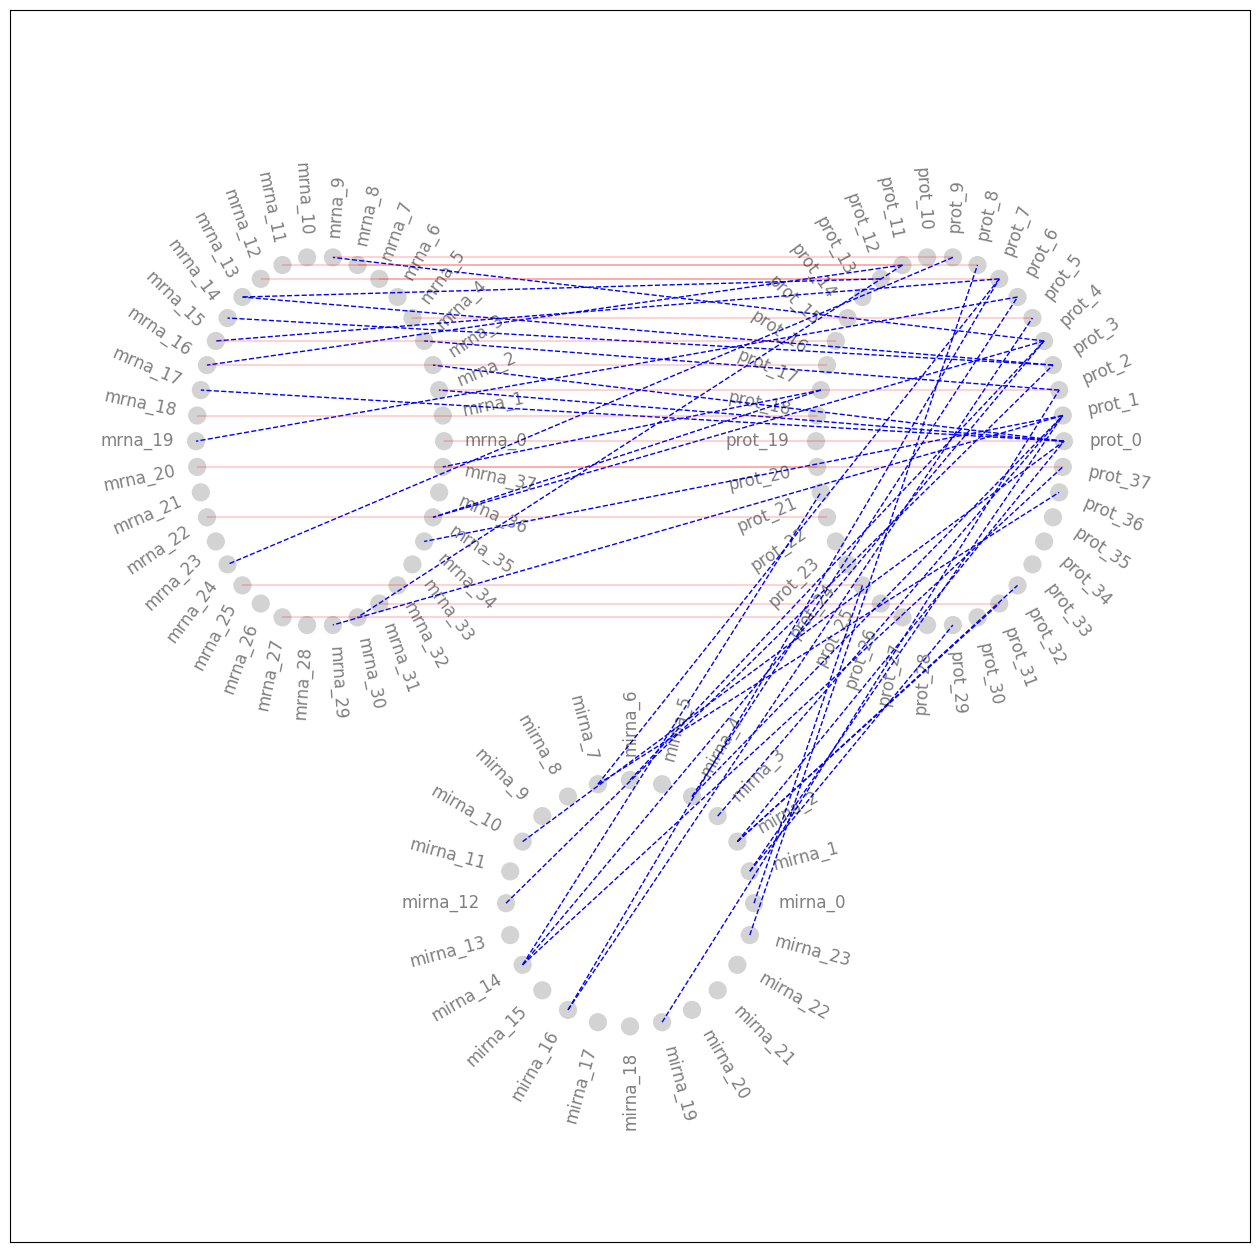

In [16]:
reload(viz_network)
reload(visualize_basic)
viz_network.draw_multi_layer_network(
    cen_lst=cen_lst,
    rad_lst=rad_lst,
    mol_name=mol_name,
    mol_grp=mol_grp,
    edge_mol0=edge_mol0,
    edge_mol1=edge_mol1,
    edge_color=edge_color,
    edge_weight=edge_weight,
    edge_style=edge_style,
    fig_size=np.array((4, 4)),
    fig_scale=4,
)